# Project: Exploratory Data Analysis of CO2-Emissions of all registered passenger cars in Germany in 2022

The Regulation (EU) No 2019/631 requires European Countries to record information for each new passenger car registered in its territory. Every year, each Member State shall submit to the Commission all the information related to their new registrations. In particular, the following details are required for each new passenger car registered: manufacturer name, type approval number, type, variant, version, make and commercial name, specific emissions of CO2 (NEDC and WLTP protocols), masses of the vehicle, wheel base, track width, engine capacity and power, fuel type and mode, eco-innovations and electricity consumption.

Under conditions defined by EU law, the WLTP laboratory test is used to measure fuel consumption and CO2 emissions from passenger cars, as well as their pollutant emissions.

** NEDC- New European Driving Cycle (Outdated) \
** WLTP- Worldwide Harmonised Light Vehicle Test Procedure

## Using the cleaned data to build a model to predict emissions

### 1. Importing the cleaned car data to a dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
car_data=pd.read_csv('clean_car_data.csv',low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
car_data

id          mp         mh  \
0        80049550  VOLKSWAGEN      SKODA   
1        80049554  VOLKSWAGEN      SKODA   
2        80049559  VOLKSWAGEN      SKODA   
3        80049562  VOLKSWAGEN      SKODA   
4        80049563  VOLKSWAGEN      SKODA   
...           ...         ...        ...   
2570989  79719120         NaN  DUPLICATE   
2570990  79898480         NaN  DUPLICATE   
2570991  79898481         NaN  DUPLICATE   
2570992  79978520         NaN  DUPLICATE   
2570993  79987802         NaN  DUPLICATE   

                                                 man          t       mk  \
0                                      SKODA AUTO AS         NW    SKODA   
1                                      SKODA AUTO AS         NW    SKODA   
2                                      SKODA AUTO AS         NW    SKODA   
3                                      SKODA AUTO AS         NW    SKODA   
4                                      SKODA AUTO AS         NW    SKODA   
...                                              ...        ...      ...   
2570989                    TOYOTA MOTOR EUROPE NV SA  XA5(EU.M)   TOYOTA   
2570990  HYUNDAI ASSAN OTOMOTIV SANAYI VE TICARET AS        BC3  HYUNDAI   
2570991  HYUNDAI ASSAN OTOMOTIV SANAYI VE TICARET AS        BC3  HYUNDAI   
2570992        HYUNDAI MOTOR MANUFACTURING CZECH SRO        PDE  HYUNDAI   
2570993        HYUNDAI MOTOR MANUFACTURING CZECH SRO       NX4E  HYUNDAI   

                  cn  m_(kg)      mt  enedc_(g/km)  ewltp_(g/km)  w_(mm)  \
0              KAMIQ  1262.0  1398.0           NaN         134.0  2639.0   
1              KAMIQ  1277.0  1393.0           NaN         134.0  2639.0   
2              KAMIQ  1242.0  1361.0           NaN         122.0  2639.0   
3              KAMIQ  1262.0  1404.0           NaN         134.0  2639.0   
4              KAMIQ  1242.0  1378.0           NaN         123.0  2639.0   
...              ...     ...     ...           ...           ...     ...   
2570989  TOYOTA RAV4  1665.0  1780.0           NaN         131.0  2690.0   
2570990        BAYON  1195.0  1320.0           NaN         124.0  2580.0   
2570991        BAYON  1195.0  1320.0           NaN         124.0  2580.0   
2570992         I 30  1444.0  1522.0           NaN         139.0  2650.0   
2570993  TUCSON IX35  1566.0  1625.0           NaN         146.0  2680.0   

         at1_(mm)  at2_(mm)      ft fm  ec_(cm3)  ep_(kw)  z_(wh/km)  \
0          1506.0    1521.0  PETROL  M     999.0     81.0        NaN   
1          1506.0    1521.0  PETROL  M     999.0     81.0        NaN   
2          1506.0    1521.0  PETROL  M     999.0     81.0        NaN   
3          1506.0    1521.0  PETROL  M     999.0     81.0        NaN   
4          1506.0    1521.0  PETROL  M     999.0     81.0        NaN   
...           ...       ...     ... ..       ...      ...        ...   
2570989    1610.0    1640.0  PETROL  H    2487.0    131.0        NaN   
2570990    1546.0    1552.0  PETROL  M     998.0     74.0        NaN   
2570991    1546.0    1552.0  PETROL  M     998.0     74.0        NaN   
2570992    1555.0    1563.0  PETROL  H    1482.0    118.0        NaN   
2570993    1615.0    1622.0  PETROL  H    1598.0    110.0        NaN   

               it  ernedc_(g/km)  erwltp_(g/km) date_of_registration  \
0             NaN            NaN            NaN           2022-10-17   
1             NaN            NaN            NaN           2022-05-24   
2             NaN            NaN            NaN           2022-04-29   
3             NaN            NaN            NaN           2022-05-11   
4             NaN            NaN            NaN           2022-05-10   
...           ...            ...            ...                  ...   
2570989       NaN            NaN            NaN           2022-08-11   
2570990  e5 29 37            NaN           2.17           2022-08-29   
2570991  e5 29 37            NaN           2.17           2022-08-29   
2570992       NaN            NaN            NaN           2022-04-05   
257

- The column names are already in snake case format

Understanding the data:

- ID
- Mp: Manufacturer's Pool
- Mh: Manufacturer name (EU standard denomination)
- Man: Manufacturer name (OEM declaration)
- T: Type
- Mk: Make
- Cn: Commercial name
- m (kg): Mass in running order
- Mt (kg): WLTP Test Mass
- Enedc (g/km): Specific CO2 Emissions (NEDC value until 31 Dec 2020)
- Ewltp (g/km): Specific CO2 Emissions (WLTP value)
- W (mm): Wheel base
- At1 (mm): Axle width steered axle (Axle 1)
- At2 (mm): Axle width other axle (Axle 2)
- Ft: Fuel type
- Fm: Fuel mode
- ec (cm3): Engine capacity
- ep (kW): Engine power or Maximum Net Power
- z (Wh/km): Electric energy consumption
- IT: Innovative technology code or eco-innovation
- Ernedc (g/km): NEDC CO2 emissions savings due to the eco-innovation(s)
- Erwltp (g/km): WLTP CO2 emissions savings due to the eco-innovation(s)
- Date of registration
- Fuel consumption: l/100 km, or m3/100 km or kg/100 km
- Electric range (km)

### 2. Data Exploration and Cleaning

In [4]:
car_data.dtypes #dtypes seems to be appropriate, except for 'date_of_registration' 

id                        int64
mp                       object
mh                       object
man                      object
t                        object
mk                       object
cn                       object
m_(kg)                  float64
mt                      float64
enedc_(g/km)            float64
ewltp_(g/km)            float64
w_(mm)                  float64
at1_(mm)                float64
at2_(mm)                float64
ft                       object
fm                       object
ec_(cm3)                float64
ep_(kw)                 float64
z_(wh/km)               float64
it                       object
ernedc_(g/km)           float64
erwltp_(g/km)           float64
date_of_registration     object
fuel_consumption_       float64
electric_range_(km)     float64
emissions               float64
dtype: object

In [5]:
car_data['date_of_registration']=pd.to_datetime(car_data['date_of_registration'])

In [6]:
car_data.describe().T

count          mean            std         min  \
id                   2570994.0  8.088130e+07  742439.535233  79595295.0   
m_(kg)               2570993.0  1.631031e+03     356.315974       570.0   
mt                   2552990.0  1.761857e+03     381.518265       616.0   
enedc_(g/km)          474144.0  1.852560e-01       2.187007         0.0   
ewltp_(g/km)         2564629.0  1.061487e+02      70.936797         0.0   
w_(mm)               2553715.0  2.706767e+03     183.625169      1765.0   
at1_(mm)             2553764.0  1.555874e+03      59.648407      1035.0   
at2_(mm)             2553762.0  1.568328e+03      59.950489       900.0   
ec_(cm3)             2100223.0  1.727131e+03     611.006283       658.0   
ep_(kw)              2570510.0  1.299267e+02      65.751438        31.0   
z_(wh/km)             817449.0  1.694331e+02      31.075694        17.0   
ernedc_(g/km)              0.0           NaN            NaN         NaN   
erwltp_(g/km)        1435031.0  1.512934e+00       0.490858         0.5   
fuel_consumption_    2068563.0  5.719638e+00       2.181725         0.5   
electric_range_(km)   331854.0  1.660238e+02     148.111817        20.0   
emissions            2564629.0  1.061487e+02      70.936797         0.0   

                             25%          50%          75%          max  
id                   80238406.25  80881350.50  81524177.75  82167227.00  
m_(kg)                   1360.00      1605.00      1845.00      4600.00  
mt                       1468.00      1731.00      1999.00      4574.00  
enedc_(g/km)                0.00         0.00         0.00        31.00  
ewltp_(g/km)               31.00       127.00       150.00       543.00  
w_(mm)                   2590.00      2679.00      2829.00      4490.00  
at1_(mm)                 1518.00      1561.00      1594.00      2700.00  
at2_(mm)                 1535.00      1574.00      1604.00      2520.00  
ec_(cm3)                 1332.00      1580.00      1984.00      6750.00  
ep_(kw)                    90.00       110.00       147.00      1001.00  
z_(wh/km)                 149.00       162.00       177.00       571.00  
ernedc_(g/km)                NaN          NaN          NaN          NaN  
erwltp_(g/km)               1.10         1.63         1.96         2.31  
fuel_consumption_           5.10         5.80         6.70        24.10  
electric_range_(km)        61.00        71.00       282.00       843.00  
emissions                  31.00       127.00       150.00       543.00

- Columns 'id' and 'ernedc_(g/km)' need to be dropped

In [7]:
car_data.drop(['id','ernedc_(g/km)'], axis=1, inplace=True)

- since 'emissions' is the target column, dropping 'enedc_(g/km)'and 'ewltp_(g/km)'

In [8]:
car_data.drop(['enedc_(g/km)','ewltp_(g/km)'],axis=1,inplace=True)

### 3. X-y Split

In [9]:
y=car_data['emissions'][car_data['cn'].isna()==False]
y=y.fillna(0)
X=car_data.drop('emissions',axis=1)

In [10]:
X.isna().sum()

mp                       123108
mh                            0
man                           0
t                          1007
mk                          402
cn                          357
m_(kg)                        1
mt                        18004
w_(mm)                    17279
at1_(mm)                  17230
at2_(mm)                  17232
ft                            0
fm                            0
ec_(cm3)                 470771
ep_(kw)                     484
z_(wh/km)               1753545
it                      1135962
erwltp_(g/km)           1135963
date_of_registration          0
fuel_consumption_        502431
electric_range_(km)     2239140
dtype: int64

In [11]:
X=X[X['cn'].isna()==False] #dropping data where we dont know the car name as it not a huge amount

In [12]:
X.head()

mp     mh            man   t     mk     cn  m_(kg)      mt  w_(mm)  \
0  VOLKSWAGEN  SKODA  SKODA AUTO AS  NW  SKODA  KAMIQ  1262.0  1398.0  2639.0   
1  VOLKSWAGEN  SKODA  SKODA AUTO AS  NW  SKODA  KAMIQ  1277.0  1393.0  2639.0   
2  VOLKSWAGEN  SKODA  SKODA AUTO AS  NW  SKODA  KAMIQ  1242.0  1361.0  2639.0   
3  VOLKSWAGEN  SKODA  SKODA AUTO AS  NW  SKODA  KAMIQ  1262.0  1404.0  2639.0   
4  VOLKSWAGEN  SKODA  SKODA AUTO AS  NW  SKODA  KAMIQ  1242.0  1378.0  2639.0   

   at1_(mm)  at2_(mm)      ft fm  ec_(cm3)  ep_(kw)  z_(wh/km)   it  \
0    1506.0    1521.0  PETROL  M     999.0     81.0        NaN  NaN   
1    1506.0    1521.0  PETROL  M     999.0     81.0        NaN  NaN   
2    1506.0    1521.0  PETROL  M     999.0     81.0        NaN  NaN   
3    1506.0    1521.0  PETROL  M     999.0     81.0        NaN  NaN   
4    1506.0    1521.0  PETROL  M     999.0     81.0        NaN  NaN   

   erwltp_(g/km) date_of_registration  fuel_consumption_  electric_range_(km)  
0            NaN           2022-10-17                5.9                  NaN  
1            NaN           2022-05-24                5.9                  NaN  
2            NaN           2022-04-29                5.4                  NaN  
3            NaN           2022-05-11                5.9                  NaN  
4            NaN           2022-05-10                5.4                  NaN

- Comparing 'mk' make and 'mh' manufacturer as there is only need for one

In [13]:
X.mk.isna().sum() #needs to be dropped

344

In [14]:
X.mh.isna().sum()

0

In [15]:
X.drop(['mp','mh','mk','cn','man','t','it','date_of_registration'],axis=1,inplace=True)

- Dropping remaining NaN's in this data doesnt make sense, it will lead to a loss of great amount of data

### 4. Checking correlation

C:\Users\jaine\AppData\Local\Temp\ipykernel_3660\3863404109.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=X.corr()


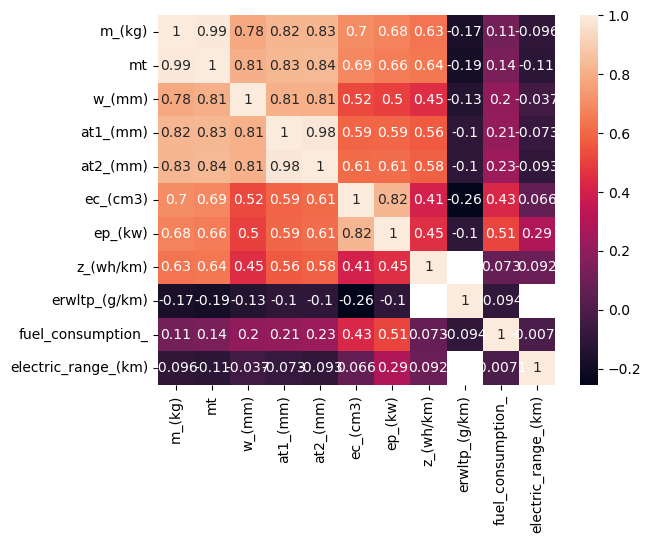

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation=X.corr()

sns.heatmap(correlation,annot=True)
plt.show()

- very high correlation between 'm_(kg)' and 'mt' as both are masses, will drop 'mt' and use 'm_(kg)' which is the running weight of the vehicle 
- very high correaltion between 'at1_(mm)' and 'at2_(mm)', either one needs to be dropped

In [17]:
X.drop(['mt','at2_(mm)'],axis=1,inplace=True)

C:\Users\jaine\AppData\Local\Temp\ipykernel_3660\2779418463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X.corrwith(y)


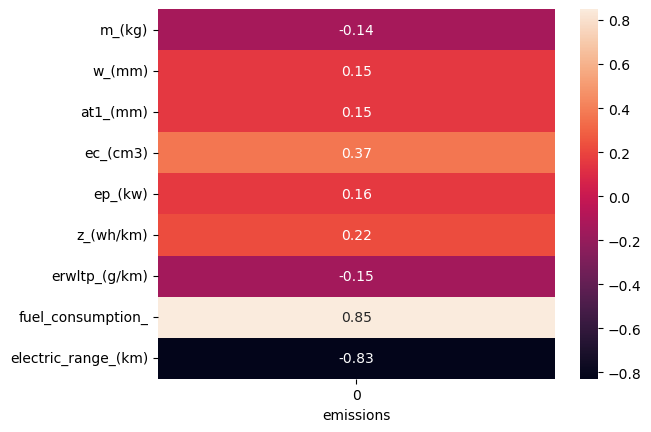

In [18]:
corr=X.corrwith(y)
sns.heatmap(corr.to_frame(),annot=True)
plt.xlabel('emissions')
plt.show()

In [19]:
X.drop(['fuel_consumption_'],axis=1,inplace=True)

#fuel consumption is directly related to emissions so it is better to drop it

### 5. Train-Test Split, Separating Numerical/Categorical, Transforming/Encoding Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [21]:
X_train.head()

m_(kg)  w_(mm)  at1_(mm)        ft fm  ec_(cm3)  ep_(kw)  z_(wh/km)  \
2475954  2072.0  2890.0    1636.0  ELECTRIC  E       NaN    235.0      173.0   
862142   1777.0  2787.0    1568.0    DIESEL  M    1968.0    147.0        NaN   
2487736  1631.0  2678.0    1569.0    DIESEL  M    1968.0    110.0        NaN   
1800590  1410.0  2669.0    1503.0    PETROL  H    1498.0     96.0        NaN   
1401139  1365.0  2322.0    1460.0  ELECTRIC  E       NaN     87.0      158.0   

         erwltp_(g/km)  electric_range_(km)  
2475954            NaN                  NaN  
862142            0.82                  NaN  
2487736           1.00                  NaN  
1800590            NaN                  NaN  
1401139            NaN                282.0

#### Numerical Data

In [22]:
X_train_num=X_train.select_dtypes(np.number)
X_test_num=X_test.select_dtypes(np.number)

In [23]:
X_train_num=X_train_num.fillna(0)
X_test_num=X_test_num.fillna(0)

In [24]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)


X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized,columns=X_train_num.columns)
X_test_norm

m_(kg)    w_(mm)  at1_(mm)  ec_(cm3)   ep_(kw)  z_(wh/km)  \
0       0.398913  0.640312  0.585185  0.000000  0.250905   0.252189   
1       0.394783  0.596882  0.580370  0.206667  0.132690   0.267951   
2       0.270652  0.567929  0.551852  0.221926  0.132690   0.000000   
3       0.335652  0.596659  0.562963  0.293926  0.217129   0.000000   
4       0.294565  0.570156  0.568519  0.239704  0.231604   0.000000   
...          ...       ...       ...       ...       ...        ...   
514123  0.486739  0.000000  0.000000  0.000000  0.092883   0.000000   
514124  0.394565  0.596437  0.585926  0.206667  0.132690   0.302977   
514125  0.453261  0.637862  0.598889  0.443407  0.452352   0.000000   
514126  0.318043  0.585078  0.560370  0.293926  0.217129   0.000000   
514127  0.413043  0.636080  0.587037  0.444148  0.331725   0.000000   

        erwltp_(g/km)  electric_range_(km)  
0            0.000000             0.000000  
1            0.000000             0.067616  
2            0.896104             0.000000  
3            0.852814             0.000000  
4            0.432900             0.000000  
...               ...                  ...  
514123       0.000000             0.000000  
514124       0.000000             0.067616  
514125       0.870130             0.000000  
514126       0.493506             0.000000  
514127       0.000000             0.000000  

[514128 rows x 8 columns]

#### Categorical Data

In [26]:
X_train_cat=X_train.select_dtypes(object)
X_test_cat=X_test.select_dtypes(object)

In [27]:
X_train_cat.head()

ft fm
2475954  ELECTRIC  E
862142     DIESEL  M
2487736    DIESEL  M
1800590    PETROL  H
1401139  ELECTRIC  E

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encoded= pd.DataFrame(encoder.transform(X_train_cat).toarray(),index=X_train_cat.index,columns=cols)
X_test_cat_encoded= pd.DataFrame(encoder.transform(X_test_cat).toarray(),index=X_test_cat.index,columns=cols)

In [29]:
#need to reset index as index of numerical transformed data is changed

X_train_cat_encoded=X_train_cat_encoded.reset_index(drop=True)
X_test_cat_encoded=X_test_cat_encoded.reset_index(drop=True)

In [30]:
X_train_trans=pd.concat([X_train_norm,X_train_cat_encoded],axis=1)
X_test_trans=pd.concat([X_test_norm,X_test_cat_encoded],axis=1)

### 6. Creating a simple model linear regression model and making predictions

In [31]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train_trans,y_train)

In [32]:
predictions=model.predict(X_test_trans)

In [33]:
predictions

array([ 10.61619568,  25.33808899, 139.30410767, ..., 227.88484192,
       167.62739563, 202.00608826])

In [34]:
model.score(X_train_trans,y_train) #score for the train data

0.9309186802353882

In [35]:
model.score(X_test_trans, y_test) #score for the test data

0.9308170846007017

#### Assessing the model using metrics with the test data and predictions

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [37]:
r2score = round(r2_score(y_test, predictions), 2)
r2score

0.93

In [38]:
mse= round(mean_squared_error(y_test,predictions))
mse

349

In [39]:
rmse = round(np.sqrt(mse), 2)
rmse

18.68

In [40]:
mae = round(mean_absolute_error(y_test, predictions), 2)
mae

13.27

These are pretty good results with a linear regression model.

### 7. Trying a list of models

In [43]:
def model_test(modellist):
    
    for model in modellist:
        
        model.fit(X_train_trans,y_train)
        
        
        # Training Data
        # R2-Score
        predictions = model.predict(X_train_trans)
        r2score = round(r2_score(y_train, predictions), 2)
        # Mean Square Error
        mse= round(mean_squared_error(y_train,predictions))
        # Root Mean Square Error
        rmse = round(np.sqrt(mse), 2)
        # Mean Absolute Error
        mae = round(mean_absolute_error(y_train, predictions), 2)
        
        
        # Test Data
        # R2-Score
        predictions = model.predict(X_test_trans)
        r2scoret = round(r2_score(y_test, predictions), 2)
        # Mean Square Error
        mset= round(mean_squared_error(y_test,predictions), 2)
        # Root Mean Square Error
        rmset = round(np.sqrt(mset), 2)
        # Mean Absolute Error
        maet = round(mean_absolute_error(y_test, predictions), 2)
        
        
        display(model)
        display(pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]}))


In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

modellist = [ 
GradientBoostingRegressor(),
             ElasticNet(),
             SGDRegressor(),
             SVR(),
             BayesianRidge(),
             KernelRidge(),
             #LGBMRegressor(),
                 LinearRegression(),
                 KNeighborsRegressor(n_neighbors  = 3),
                 KNeighborsRegressor(n_neighbors  = 5),
                 KNeighborsRegressor(n_neighbors  = 10),
                 MLPRegressor()
            ]

In [45]:
print(modellist)

[GradientBoostingRegressor(), ElasticNet(), SGDRegressor(), SVR(), BayesianRidge(), KernelRidge(), LinearRegression(), KNeighborsRegressor(n_neighbors=3), KNeighborsRegressor(), KNeighborsRegressor(n_neighbors=10), MLPRegressor()]


In [46]:
#model_test(modellist) 

#commented as it takes a lot of time to compute all the models